1: Read the dataset and do necessary preprocessing

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('synthetic_perceptron_dataset.csv')

# Impute null values with the mean for 'Feature2'
imputer = SimpleImputer(strategy='mean')
dataset['Feature2'] = imputer.fit_transform(dataset[['Feature2']])

# Encode categorical variable 'CategoricalFeature' to numeric
encoder = LabelEncoder()
dataset['CategoricalFeature'] = encoder.fit_transform(dataset['CategoricalFeature'])

dataset.head()

,Feature1,Feature2,Feature3,Feature4,Target,CategoricalFeature
0,0.155592,-0.213447,-0.718444,0.140962,1,1
1,2.548817,0.401712,-0.108760,2.502258,1,1
2,0.739028,0.791663,1.158111,0.821807,1,2
3,0.769169,-1.435862,1.441273,-1.060967,0,0
4,1.431174,0.852433,-0.661786,-0.708083,0,1


2: Determine the number of epochs which have minimum error

In [2]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.errors = []

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            error = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                error += update != 0.0
            self.errors.append(error)

        return self

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

# Now we can train our perceptron and plot the errors
perceptron = Perceptron(learning_rate=0.1, epochs=10)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
perceptron.fit(X, y)

3: Display final weight of each attribute which have minimum error

In [3]:
print(f'Final weights: {perceptron.weights}')

Final weights: [-0.15482566  0.06907392  0.13620062 -0.1782638   0.3       ]


4: Plot the convergence of error for each iteration

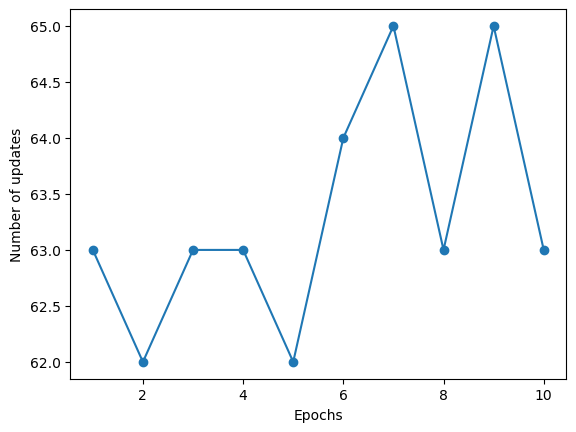

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()